<a href="https://colab.research.google.com/github/drfperez/nautica/blob/main/Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== PAS 1: Vaixell + Vent ===


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

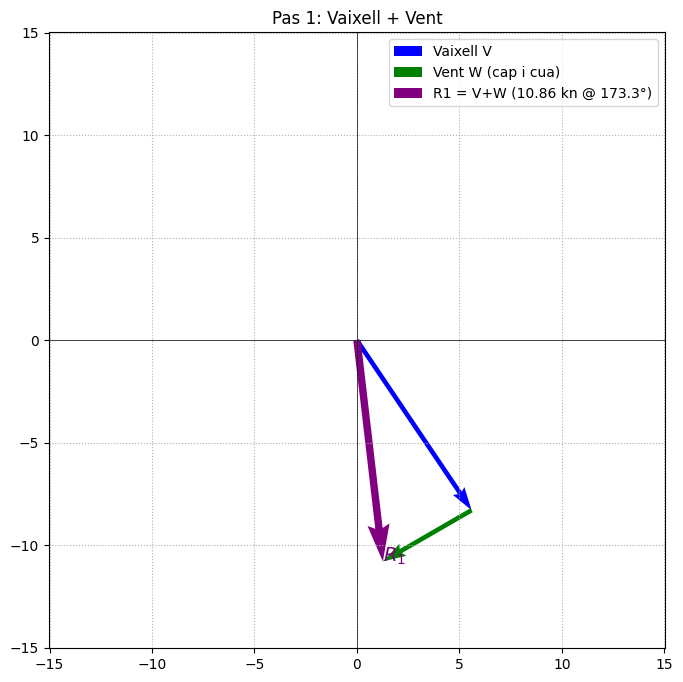

=== PAS 2: (Vaixell+Vent) + Corrent ===


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

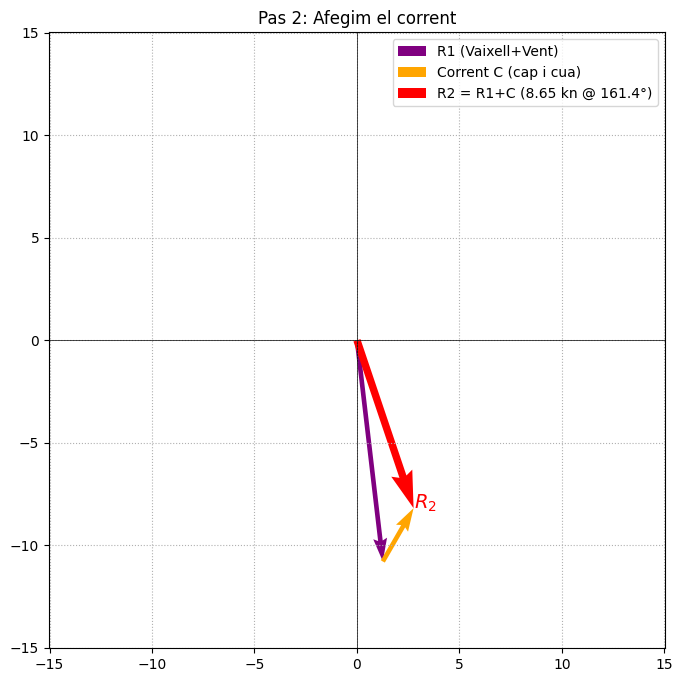

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math

# ==================================================
# Script Colab: Suma vectorial pas a pas amb càlcul detallat de mòdul i angle
# Sistema nàutic: 0° = Nord, sentit horari
# ==================================================

# Variables simbòliques
v, w, c = sp.symbols('v w c')
θV, θW, θC = sp.symbols('θV θW θC')

# Funció per convertir rumb i velocitat a components cartesianes
def rumb_a_xy(rumb_graus, velocitat):
    theta = np.radians(rumb_graus)
    x = velocitat * np.sin(theta)
    y = velocitat * np.cos(theta)
    return np.array([x, y]), theta

# --------------------------
# Vectors inicials
# --------------------------
V, theta_V = rumb_a_xy(146, 10)
W, theta_W = rumb_a_xy(240, 5)
C, theta_C = rumb_a_xy(30, 3)

# ==================================================
# Pas 1: Vaixell + Vent
# ==================================================
R1 = V + W
R1x, R1y = R1[0], R1[1]
modul_R1 = np.sqrt(R1x**2 + R1y**2)
ang_R1 = (np.degrees(np.arctan2(R1x, R1y)) + 360) % 360

print("=== PAS 1: Vaixell + Vent ===")
display(Math(rf"V_x = 10 \cdot \sin(146^\circ) = {V[0]:.2f}"))
display(Math(rf"V_y = 10 \cdot \cos(146^\circ) = {V[1]:.2f}"))
display(Math(rf"W_x = 5 \cdot \sin(240^\circ) = {W[0]:.2f}"))
display(Math(rf"W_y = 5 \cdot \cos(240^\circ) = {W[1]:.2f}"))
display(Math(rf"R_1x = V_x + W_x = {V[0]:.2f} + {W[0]:.2f} = {R1x:.2f}"))
display(Math(rf"R_1y = V_y + W_y = {V[1]:.2f} + {W[1]:.2f} = {R1y:.2f}"))
display(Math(rf"|R_1| = \sqrt{{R_1x^2 + R_1y^2}} = \sqrt{{{R1x:.2f}^2 + {R1y:.2f}^2}} = {modul_R1:.2f} \, kn"))
display(Math(rf"rumb = \arctan\left(\frac{{R_1x}}{{R_1y}}\right) = {ang_R1:.2f}^\circ"))

# Gràfic Pas 1
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.quiver(0,0, V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vaixell V')
ax.quiver(V[0],V[1], W[0], W[1], angles='xy', scale_units='xy', scale=1, color='green', label='Vent W (cap i cua)')
ax.quiver(0,0, R1[0], R1[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.012, label=f'R1 = V+W ({modul_R1:.2f} kn @ {ang_R1:.1f}°)')
ax.text(R1[0], R1[1], r'$R_1$', fontsize=14, color='purple')
max_range = max(np.abs([V[0],V[1],W[0],W[1],R1[0],R1[1]]))*1.3+1
ax.set_xlim(-max_range,max_range)
ax.set_ylim(-max_range,max_range)
ax.set_aspect('equal','box')
ax.grid(True, linestyle=':')
ax.set_title('Pas 1: Vaixell + Vent')
ax.legend(loc='upper right')
plt.show()

# ==================================================
# Pas 2: Afegim el Corrent
# ==================================================
R2 = R1 + C
R2x, R2y = R2[0], R2[1]
modul_R2 = np.sqrt(R2x**2 + R2y**2)
ang_R2 = (np.degrees(np.arctan2(R2x, R2y)) + 360) % 360

print("=== PAS 2: (Vaixell+Vent) + Corrent ===")
display(Math(rf"C_x = 3 \cdot \sin(30^\circ) = {C[0]:.2f}"))
display(Math(rf"C_y = 3 \cdot \cos(30^\circ) = {C[1]:.2f}"))
display(Math(rf"R_2x = R_1x + C_x = {R1x:.2f} + {C[0]:.2f} = {R2x:.2f}"))
display(Math(rf"R_2y = R_1y + C_y = {R1y:.2f} + {C[1]:.2f} = {R2y:.2f}"))
display(Math(rf"|R_2| = \sqrt{{R_2x^2 + R_2y^2}} = \sqrt{{{R2x:.2f}^2 + {R2y:.2f}^2}} = {modul_R2:.2f} \, kn"))
display(Math(rf"rumb = \arctan\left(\frac{{R_2x}}{{R_2y}}\right) = {ang_R2:.2f}^\circ"))

# Gràfic Pas 2
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.quiver(0,0, R1[0], R1[1], angles='xy', scale_units='xy', scale=1, color='purple', label='R1 (Vaixell+Vent)')
ax.quiver(R1[0],R1[1], C[0], C[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Corrent C (cap i cua)')
ax.quiver(0,0, R2[0], R2[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.012, label=f'R2 = R1+C ({modul_R2:.2f} kn @ {ang_R2:.1f}°)')
ax.text(R2[0], R2[1], r'$R_2$', fontsize=14, color='red')
max_range = max(np.abs([R1[0],R1[1],C[0],C[1],R2[0],R2[1]]))*1.3+1
ax.set_xlim(-max_range,max_range)
ax.set_ylim(-max_range,max_range)
ax.set_aspect('equal','box')
ax.grid(True, linestyle=':')
ax.set_title('Pas 2: Afegim el corrent')
ax.legend(loc='upper right')
plt.show()

=== PAS 1: Vaixell + Vent ===


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

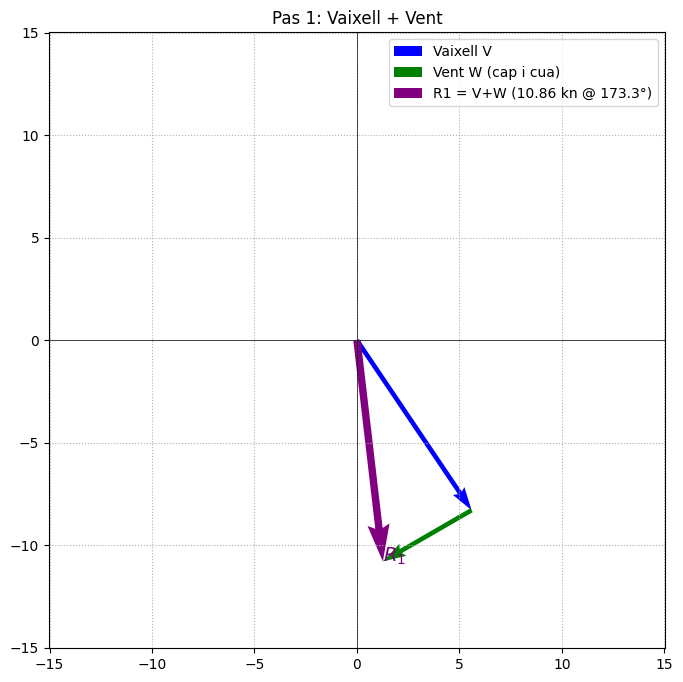

=== PAS 2: (Vaixell+Vent) + Corrent ===


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

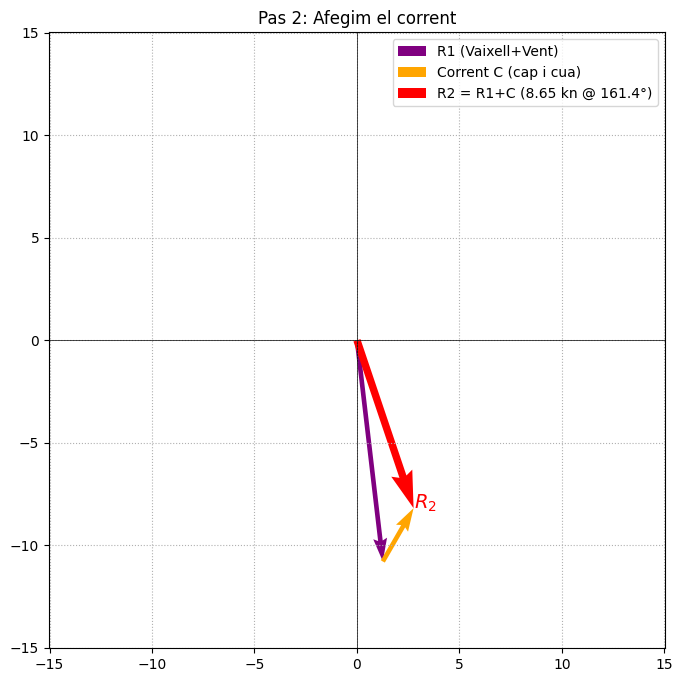

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from IPython.display import display, Math

# ==================================================
# Script Colab: Suma vectorial pas a pas amb LaTeX correcte
# Sistema nàutic: 0° = Nord, sentit horari
# ==================================================

# Variables simbòliques
v, w, c = sp.symbols('v w c')
θV, θW, θC = sp.symbols('θV θW θC')

# Funció per convertir rumb i velocitat a components cartesianes
def rumb_a_xy(rumb_graus, velocitat):
    theta = np.radians(rumb_graus)
    x = velocitat * np.sin(theta)
    y = velocitat * np.cos(theta)
    return np.array([x, y]), theta

# --------------------------
# Vectors inicials
# --------------------------
V, theta_V = rumb_a_xy(146, 10)
W, theta_W = rumb_a_xy(240, 5)
C, theta_C = rumb_a_xy(30, 3)

# ==================================================
# Pas 1: Vaixell + Vent
# ==================================================
R1 = V + W
modul_R1 = np.linalg.norm(R1)
ang_R1 = (np.degrees(np.arctan2(R1[0], R1[1])) + 360) % 360

print("=== PAS 1: Vaixell + Vent ===")
display(Math(rf"V_x = 10 \cdot \sin(146^\circ) = {V[0]:.2f}"))
display(Math(rf"V_y = 10 \cdot \cos(146^\circ) = {V[1]:.2f}"))
display(Math(rf"W_x = 5 \cdot \sin(240^\circ) = {W[0]:.2f}"))
display(Math(rf"W_y = 5 \cdot \cos(240^\circ) = {W[1]:.2f}"))
display(Math(rf"R_1 = (V_x+W_x, V_y+W_y) = ({R1[0]:.2f}, {R1[1]:.2f})"))
display(Math(rf"|R_1| = {modul_R1:.2f} \, kn, \quad rumb = {ang_R1:.2f}^\circ"))

# Gràfic Pas 1
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.quiver(0,0, V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vaixell V')
ax.quiver(V[0],V[1], W[0], W[1], angles='xy', scale_units='xy', scale=1, color='green', label='Vent W (cap i cua)')
ax.quiver(0,0, R1[0], R1[1], angles='xy', scale_units='xy', scale=1, color='purple', width=0.012, label=f'R1 = V+W ({modul_R1:.2f} kn @ {ang_R1:.1f}°)')
ax.text(R1[0], R1[1], r'$R_1$', fontsize=14, color='purple')
max_range = max(np.abs([V[0],V[1],W[0],W[1],R1[0],R1[1]]))*1.3+1
ax.set_xlim(-max_range,max_range)
ax.set_ylim(-max_range,max_range)
ax.set_aspect('equal','box')
ax.grid(True, linestyle=':')
ax.set_title('Pas 1: Vaixell + Vent')
ax.legend(loc='upper right')
plt.show()

# ==================================================
# Pas 2: Afegim el Corrent
# ==================================================
R2 = R1 + C
modul_R2 = np.linalg.norm(R2)
ang_R2 = (np.degrees(np.arctan2(R2[0], R2[1])) + 360) % 360

print("=== PAS 2: (Vaixell+Vent) + Corrent ===")
display(Math(rf"C_x = 3 \cdot \sin(30^\circ) = {C[0]:.2f}"))
display(Math(rf"C_y = 3 \cdot \cos(30^\circ) = {C[1]:.2f}"))
display(Math(rf"R_2 = (R_1x+C_x, R_1y+C_y) = ({R2[0]:.2f}, {R2[1]:.2f})"))
display(Math(rf"|R_2| = {modul_R2:.2f} \, kn, \quad rumb = {ang_R2:.2f}^\circ"))

# Gràfic Pas 2
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.quiver(0,0, R1[0], R1[1], angles='xy', scale_units='xy', scale=1, color='purple', label='R1 (Vaixell+Vent)')
ax.quiver(R1[0],R1[1], C[0], C[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Corrent C (cap i cua)')
ax.quiver(0,0, R2[0], R2[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.012, label=f'R2 = R1+C ({modul_R2:.2f} kn @ {ang_R2:.1f}°)')
ax.text(R2[0], R2[1], r'$R_2$', fontsize=14, color='red')
max_range = max(np.abs([R1[0],R1[1],C[0],C[1],R2[0],R2[1]]))*1.3+1
ax.set_xlim(-max_range,max_range)
ax.set_ylim(-max_range,max_range)
ax.set_aspect('equal','box')
ax.grid(True, linestyle=':')
ax.set_title('Pas 2: Afegim el corrent')
ax.legend(loc='upper right')
plt.show()

Components de V (vaixell): [ 5.59192903 -8.29037573]
Components de W (vent): [-4.33012702 -2.5       ]
Components de C (corrent): [1.5        2.59807621]
Vector resultant R: [ 2.76180202 -8.19229951]
Mòdul de R: 8.645306339552675
Rumb resultant R: 161.36992153808092 °


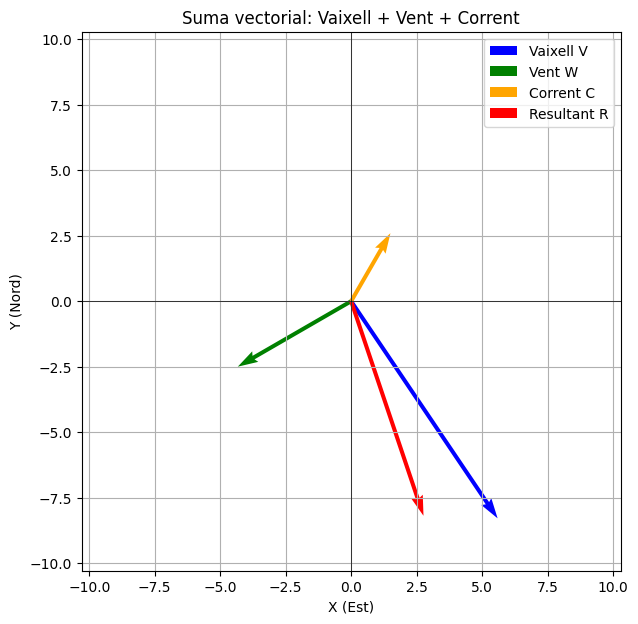

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Funció per convertir rumb i velocitat a components cartesianes (X = Est, Y = Nord)
def rumb_a_xy(rumb_graus, velocitat):
    theta = np.radians(rumb_graus)
    x = velocitat * np.sin(theta)
    y = velocitat * np.cos(theta)
    return np.array([x, y])

# Vectors donats
V = rumb_a_xy(146, 10)   # vaixell
W = rumb_a_xy(240, 5)    # vent
C = rumb_a_xy(30, 3)     # corrent

# Comprovem components individuals per verificar la suma
print("Components de V (vaixell):", V)
print("Components de W (vent):", W)
print("Components de C (corrent):", C)

# Vector resultant
R = V + W + C

# Impressió del resultat final
print("Vector resultant R:", R)
print("Mòdul de R:", np.linalg.norm(R))

# Càlcul del rumb resultant (0° = Nord, sentit horari)
rumb_R = np.degrees(np.arctan2(R[0], R[1]))
rumb_R = (rumb_R + 360) % 360  # normalitzar a 0-360°
print("Rumb resultant R:", rumb_R, "°")

# Dibuix dels vectors
plt.figure(figsize=(7,7))
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Representació dels vectors amb colors diferents
plt.quiver(0,0, V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vaixell V')
plt.quiver(0,0, W[0], W[1], angles='xy', scale_units='xy', scale=1, color='green', label='Vent W')
plt.quiver(0,0, C[0], C[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Corrent C')
plt.quiver(0,0, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='red', linewidth=2, label='Resultant R')

# Escala dels eixos amb marge
max_val = max(np.abs([V[0], V[1], W[0], W[1], C[0], C[1], R[0], R[1]])) + 2
plt.xlim(-max_val, max_val)
plt.ylim(-max_val, max_val)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title("Suma vectorial: Vaixell + Vent + Corrent")
plt.xlabel("X (Est)")
plt.ylabel("Y (Nord)")
plt.grid(True)
plt.show()

--- Vaixell (V) ---
Rumb (graus): 146°
Theta (radians) = radians(146) = 2.548181 rad
sin(theta) = 0.559193
cos(theta) = -0.829038
x (Est) = velocitat * sin(theta) = 10 * 0.559193 = 5.591929 kn
y (Nord) = velocitat * cos(theta) = 10 * -0.829038 = -8.290376 kn

--- Vent (W) ---
Rumb (graus): 240°
Theta (radians) = radians(240) = 4.188790 rad
sin(theta) = -0.866025
cos(theta) = -0.500000
x (Est) = velocitat * sin(theta) = 5 * -0.866025 = -4.330127 kn
y (Nord) = velocitat * cos(theta) = 5 * -0.500000 = -2.500000 kn

--- Corrent (C) ---
Rumb (graus): 30°
Theta (radians) = radians(30) = 0.523599 rad
sin(theta) = 0.500000
cos(theta) = 0.866025
x (Est) = velocitat * sin(theta) = 3 * 0.500000 = 1.500000 kn
y (Nord) = velocitat * cos(theta) = 3 * 0.866025 = 2.598076 kn

Components resumides (X, Y) en nusos:
V (Vaixell) : X = 5.591929, Y = -8.290376
W (Vent)    : X = -4.330127, Y = -2.500000
C (Corrent) : X = 1.500000, Y = 2.598076

Càlcul del vector resultant R = V + W + C:
R_x = V_x + W_x + C_x

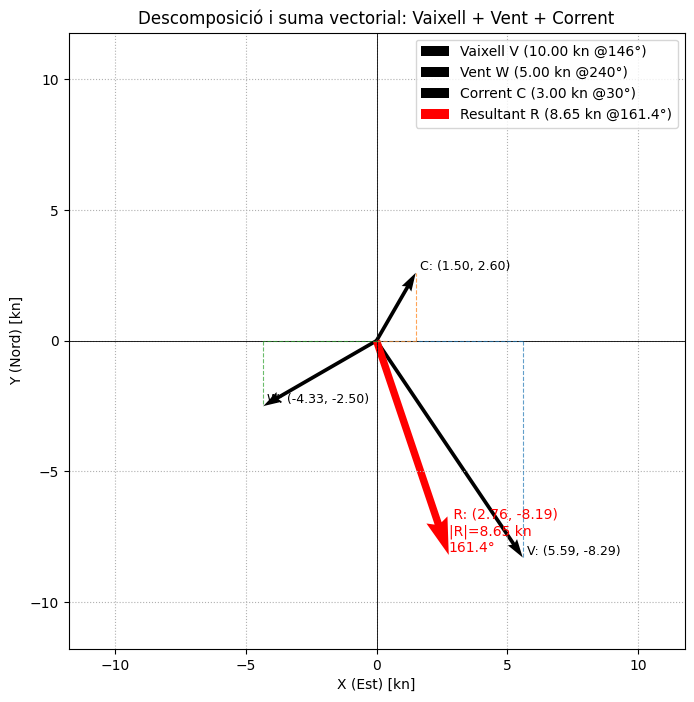

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# ==================================================
# Càlcul pas a pas de la suma vectorial (Català)
# Coordenades: X = Est, Y = Nord
# Rumb: 0° = Nord, sentit horari
# Vectors donats (graus, nusos):
#  - Vaixell V: rumb 146°, velocitat 10 kn
#  - Vent W:   rumb 240°, velocitat 5 kn
#  - Corrent C: rumb 30°,  velocitat 3 kn
# ==================================================

# Funció que calcula components i mostra els passos
def rumb_a_xy(rumb_graus, velocitat, etiqueta=""):
    theta = np.radians(rumb_graus)
    sin_th = np.sin(theta)
    cos_th = np.cos(theta)
    x = velocitat * sin_th  # component Est
    y = velocitat * cos_th  # component Nord

    print(f"--- {etiqueta} ---")
    print(f"Rumb (graus): {rumb_graus}°")
    print(f"Theta (radians) = radians({rumb_graus}) = {theta:.6f} rad")
    print(f"sin(theta) = {sin_th:.6f}")
    print(f"cos(theta) = {cos_th:.6f}")
    print(f"x (Est) = velocitat * sin(theta) = {velocitat} * {sin_th:.6f} = {x:.6f} kn")
    print(f"y (Nord) = velocitat * cos(theta) = {velocitat} * {cos_th:.6f} = {y:.6f} kn")
    print("")

    return np.array([x, y])

# -----------------------
# Càlculs individuals
# -----------------------
V = rumb_a_xy(146, 10, etiqueta='Vaixell (V)')
W = rumb_a_xy(240, 5,  etiqueta='Vent (W)')
C = rumb_a_xy(30,  3,  etiqueta='Corrent (C)')

# Mostrar les components resumides amb format
print("Components resumides (X, Y) en nusos:")
print(f"V (Vaixell) : X = {V[0]:.6f}, Y = {V[1]:.6f}")
print(f"W (Vent)    : X = {W[0]:.6f}, Y = {W[1]:.6f}")
print(f"C (Corrent) : X = {C[0]:.6f}, Y = {C[1]:.6f}")
print("")

# -----------------------
# Suma vectorial pas a pas
# -----------------------
Rx = V[0] + W[0] + C[0]
Ry = V[1] + W[1] + C[1]

print("Càlcul del vector resultant R = V + W + C:")
print(f"R_x = V_x + W_x + C_x = {V[0]:.6f} + {W[0]:.6f} + {C[0]:.6f} = {Rx:.6f} kn (Est)")
print(f"R_y = V_y + W_y + C_y = {V[1]:.6f} + {W[1]:.6f} + {C[1]:.6f} = {Ry:.6f} kn (Nord)")

R = np.array([Rx, Ry])

# Mòdul (velocitat resultant) i rumb
modul_R = np.hypot(Rx, Ry)  # equival a sqrt(Rx^2 + Ry^2)

# Per obtenir el rumb (0° = Nord, sentit horari) fem atan2(East, North)
ang_rad = np.arctan2(Rx, Ry)          # atan2(x, y) aquí = atan2(East, North)
ang_deg = np.degrees(ang_rad)         # convertir a graus (pot ser negatiu)
ang_deg_norm = (ang_deg + 360) % 360  # normalitzar a [0,360)

print("")
print(f"Mòdul de R = sqrt(Rx^2 + Ry^2) = {modul_R:.6f} kn")
print(f"Càlcul de l'angle: atan2(Rx, Ry) = atan2({Rx:.6f}, {Ry:.6f}) = {ang_rad:.6f} rad")
print(f"Angle en graus (possiblement negatiu) = {ang_deg:.6f} °")
print(f"Rumb normalitzat (0° Nord, sentit horari) = {ang_deg_norm:.6f} °")
print("")
print("Resultat final (arrodonit):")
print(f"Vector resultant R = (X = {Rx:.4f} kn, Y = {Ry:.4f} kn)")
print(f"Velocitat resultant |R| = {modul_R:.4f} kn")
print(f"Rumb resultant = {ang_deg_norm:.2f}° (0° = Nord, sentit horari)")

# -----------------------
# Visualització gràfica amb components i anotacions
# -----------------------
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.axhline(0, color='black', linewidth=0.6)
ax.axvline(0, color='black', linewidth=0.6)

# Dibuixar vectors amb quiver (començant a l'origen)
ax.quiver(0, 0, V[0], V[1], angles='xy', scale_units='xy', scale=1, width=0.006, label=f"Vaixell V ({np.linalg.norm(V):.2f} kn @146°)")
ax.quiver(0, 0, W[0], W[1], angles='xy', scale_units='xy', scale=1, width=0.006, label=f"Vent W ({np.linalg.norm(W):.2f} kn @240°)")
ax.quiver(0, 0, C[0], C[1], angles='xy', scale_units='xy', scale=1, width=0.006, label=f"Corrent C ({np.linalg.norm(C):.2f} kn @30°)")
# Resultant més destacada
ax.quiver(0, 0, R[0], R[1], angles='xy', scale_units='xy', scale=1, width=0.012, color='red', label=f"Resultant R ({modul_R:.2f} kn @{ang_deg_norm:.1f}°)")

# Dibuixar components (projeccions) per a cada vector (linies puntejades)
for vec, col in [(V, 'tab:blue'), (W, 'tab:green'), (C, 'tab:orange')]:
    # projecció horitzontal
    ax.plot([0, vec[0]], [0, 0], linestyle='--', linewidth=0.8, color=col, alpha=0.7)
    # projecció vertical
    ax.plot([vec[0], vec[0]], [0, vec[1]], linestyle='--', linewidth=0.8, color=col, alpha=0.7)

# Anotacions amb els valors de components
ax.text(V[0], V[1], f" V: ({V[0]:.2f}, {V[1]:.2f})", fontsize=9, va='bottom')
ax.text(W[0], W[1], f" W: ({W[0]:.2f}, {W[1]:.2f})", fontsize=9, va='bottom')
ax.text(C[0], C[1], f" C: ({C[0]:.2f}, {C[1]:.2f})", fontsize=9, va='bottom')
ax.text(R[0], R[1], f" R: ({R[0]:.2f}, {R[1]:.2f})\n|R|={modul_R:.2f} kn\n{ang_deg_norm:.1f}°", fontsize=10, color='red', va='bottom')

# Ajustar límits
vals = np.abs([V[0], V[1], W[0], W[1], C[0], C[1], R[0], R[1]])
max_range = max(vals) * 1.3 + 1.0
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle=':')
ax.set_xlabel('X (Est) [kn]')
ax.set_ylabel('Y (Nord) [kn]')
ax.set_title('Descomposició i suma vectorial: Vaixell + Vent + Corrent')
ax.legend(loc='upper right')

plt.show()

Resultat mètode cap i cua:
Vector resultant R = (2.76, -8.19)
Mòdul |R| = 8.65 kn
Rumb resultant = 161.37° (0° = Nord, sentit horari)


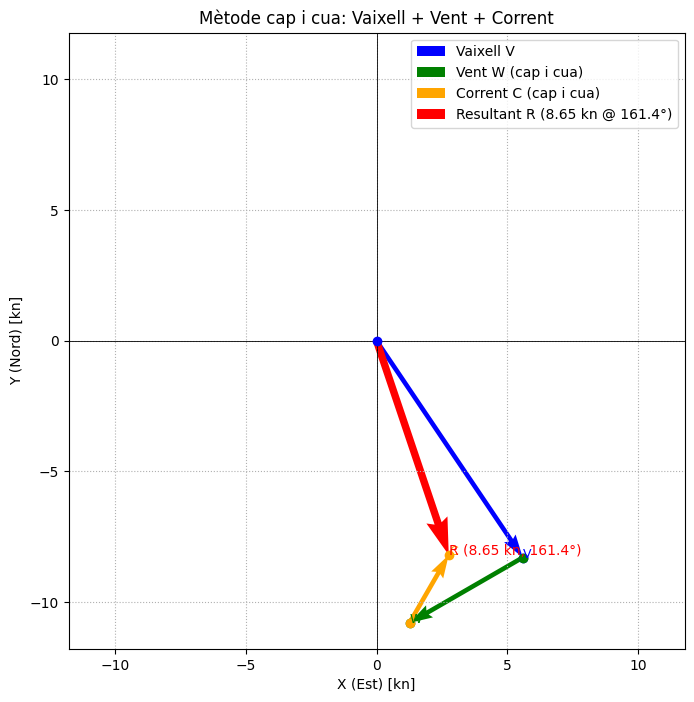

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# ==================================================
# Suma vectorial amb el mètode cap i cua
# Coordenades: X = Est, Y = Nord
# Rumb: 0° = Nord, sentit horari
# Vectors donats (graus, nusos):
#  - Vaixell V: rumb 146°, velocitat 10 kn
#  - Vent W:   rumb 240°, velocitat 5 kn
#  - Corrent C: rumb 30°,  velocitat 3 kn
# ==================================================

def rumb_a_xy(rumb_graus, velocitat):
    theta = np.radians(rumb_graus)
    x = velocitat * np.sin(theta)
    y = velocitat * np.cos(theta)
    return np.array([x, y])

# Vectors
V = rumb_a_xy(146, 10)
W = rumb_a_xy(240, 5)
C = rumb_a_xy(30, 3)

# Mètode cap i cua: anem concatenant els vectors
punt_inici = np.array([0,0])
punt_V = V
punt_W = punt_V + W
punt_C = punt_W + C

# Vector resultant de l'origen al final
R = punt_C

# Mòdul i rumb del resultant
modul_R = np.linalg.norm(R)
ang_rad = np.arctan2(R[0], R[1])
ang_deg = np.degrees(ang_rad)
ang_deg_norm = (ang_deg + 360) % 360

print("Resultat mètode cap i cua:")
print(f"Vector resultant R = ({R[0]:.2f}, {R[1]:.2f})")
print(f"Mòdul |R| = {modul_R:.2f} kn")
print(f"Rumb resultant = {ang_deg_norm:.2f}° (0° = Nord, sentit horari)")

# -----------------------
# Dibuix cap i cua
# -----------------------
plt.figure(figsize=(8,8))
ax = plt.gca()
ax.axhline(0, color='black', linewidth=0.6)
ax.axvline(0, color='black', linewidth=0.6)

# Dibuixar els vectors concatenats
ax.quiver(punt_inici[0], punt_inici[1], V[0], V[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vaixell V')
ax.quiver(punt_V[0], punt_V[1], W[0], W[1], angles='xy', scale_units='xy', scale=1, color='green', label='Vent W (cap i cua)')
ax.quiver(punt_W[0], punt_W[1], C[0], C[1], angles='xy', scale_units='xy', scale=1, color='orange', label='Corrent C (cap i cua)')

# Vector resultant des de l’origen fins al final
ax.quiver(0, 0, R[0], R[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.012, label=f"Resultant R ({modul_R:.2f} kn @ {ang_deg_norm:.1f}°)")

# Punts intermedis
ax.plot([0, punt_V[0]], [0, punt_V[1]], 'o', color='blue')
ax.plot([punt_V[0], punt_W[0]], [punt_V[1], punt_W[1]], 'o', color='green')
ax.plot([punt_W[0], punt_C[0]], [punt_W[1], punt_C[1]], 'o', color='orange')

# Anotacions
ax.text(V[0], V[1], 'V', fontsize=9, color='blue')
ax.text(punt_W[0], punt_W[1], 'W', fontsize=9, color='green')
ax.text(punt_C[0], punt_C[1], 'C', fontsize=9, color='orange')
ax.text(R[0], R[1], f"R ({modul_R:.2f} kn, {ang_deg_norm:.1f}°)", fontsize=10, color='red')

# Límits
vals = np.abs([V[0], V[1], W[0], W[1], C[0], C[1], R[0], R[1]])
max_range = max(vals) * 1.3 + 1.0
ax.set_xlim(-max_range, max_range)
ax.set_ylim(-max_range, max_range)

ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle=':')
ax.set_xlabel('X (Est) [kn]')
ax.set_ylabel('Y (Nord) [kn]')
ax.set_title('Mètode cap i cua: Vaixell + Vent + Corrent')
ax.legend(loc='upper right')

plt.show()